In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'aitxdil-project-jupyter:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F51284%2F5464955%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241009%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241009T165316Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3d21840561d98be291cc5b1a252dc9a6527e1388ae7d3b7f87bce0253bce7fed62d3ca1c72a49d09de6084f6e42a4849f713885c8cc01786d360a05d456ac7dea746de266cef002f34c0eb03a3ede2ff1ff14bd1c88d94653b4a8b2ba8bc7bebf39a7b9cbeddca408c606f675e193b85be14a75396a45c33437c4016bf0fa2fd18453b83b851dd3d6adae44545f6410a319e897af4d65290a98253fe6c94fdf05d1b88e4b2234caf3fa4e45c8b756492245130f4ef5d8c7e61e9b10599ad76cab98786178f0c76095776b2d322be1959188a88429bdc3e268be9e54e3b06a681e64d3a400b7327f4063a947bac96057c9173f13300656300778c45fffb05f5e6'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aitxdil-project-jupyter/sampleSubmission.csv
/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data/94.png
/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data/48.png
/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data/61.png
/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data/37.png
/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data/35.png
/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data/70.png
/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data/73.png
/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data/92.png
/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data/75.png
/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data/89.png
/kaggle/input/aitxdil-project-jupyter/Cleaned_Train

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

import cv2
from tqdm import tqdm
import random as rn

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
# from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [ ]:
X=[]
IMG_SIZE=300

In [ ]:
def make_train_data(X,DIR):
    for img in tqdm(os.listdir(DIR)):

        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (540,420))

        X.append(np.array(img))
#         Z.append(str(label))

In [ ]:
make_train_data(X,DIR = '/kaggle/input/aitxdil-project-jupyter/Training_Data/Training_Data')

100%|██████████| 100/100 [00:01<00:00, 73.50it/s]


In [ ]:
Y=[]
make_train_data(Y,DIR = '/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data')
Y = np.array(Y)
X = np.array(X)

X=X/255
Y=Y/255
print(X.shape)
print(Y.shape)

100%|██████████| 100/100 [00:01<00:00, 91.42it/s]


(100, 420, 540, 3)
(100, 420, 540, 3)


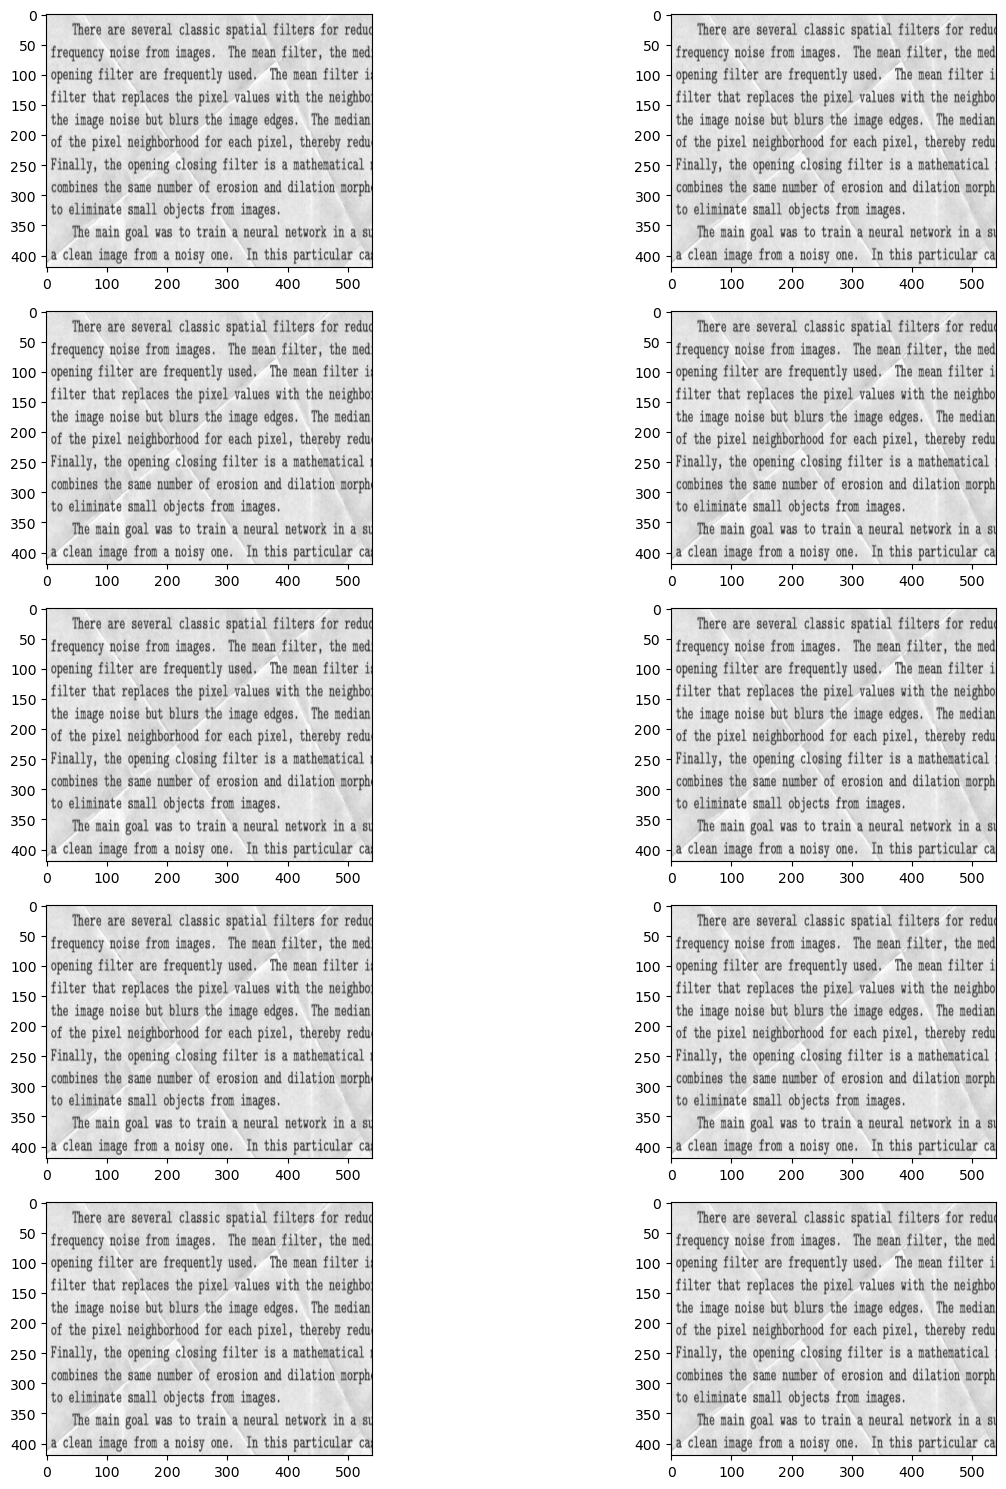

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):

        ax[i,j].imshow(X[6])
#         ax[i,j].imshow(X[50])


plt.tight_layout()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [ ]:
input_shape = (420, 540, 3)
num_filters = [32, 64, 128]

inputs = keras.layers.Input(shape=input_shape)

x = keras.layers.Conv2D(32 ,(3, 3), activation='relu', padding='same')(inputs)

for f in num_filters[1:]:
    x = keras.layers.Conv2D(f, (3, 3), activation='relu', padding='same')(x)

outputs = keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

model = keras.Model(inputs=inputs, outputs=outputs)





In [ ]:
model.compile(loss='mse', optimizer=Adam(lr=0.001))

In [ ]:
model.fit(X, Y, epochs=150, batch_size=32)

Epoch 1/150
4/4 [==============================] - 16s 1s/step - loss: 0.2026
Epoch 2/150
4/4 [==============================] - 2s 554ms/step - loss: 0.0767
Epoch 3/150
4/4 [==============================] - 2s 562ms/step - loss: 0.0616
Epoch 4/150
4/4 [==============================] - 2s 562ms/step - loss: 0.0533
Epoch 5/150
4/4 [==============================] - 2s 558ms/step - loss: 0.0335
Epoch 6/150
4/4 [==============================] - 2s 557ms/step - loss: 0.0241
Epoch 7/150
4/4 [==============================] - 2s 553ms/step - loss: 0.0152
Epoch 8/150
4/4 [==============================] - 2s 556ms/step - loss: 0.0106
Epoch 9/150
4/4 [==============================] - 2s 555ms/step - loss: 0.0089
Epoch 10/150
4/4 [==============================] - 2s 568ms/step - loss: 0.0074
Epoch 11/150
4/4 [==============================] - 2s 567ms/step - loss: 0.0061
Epoch 12/150
4/4 [==============================] - 2s 558ms/step - loss: 0.0052
Epoch 13/150
4/4 [=====================

In [ ]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

1/1 [==============================] - 1s 981ms/step


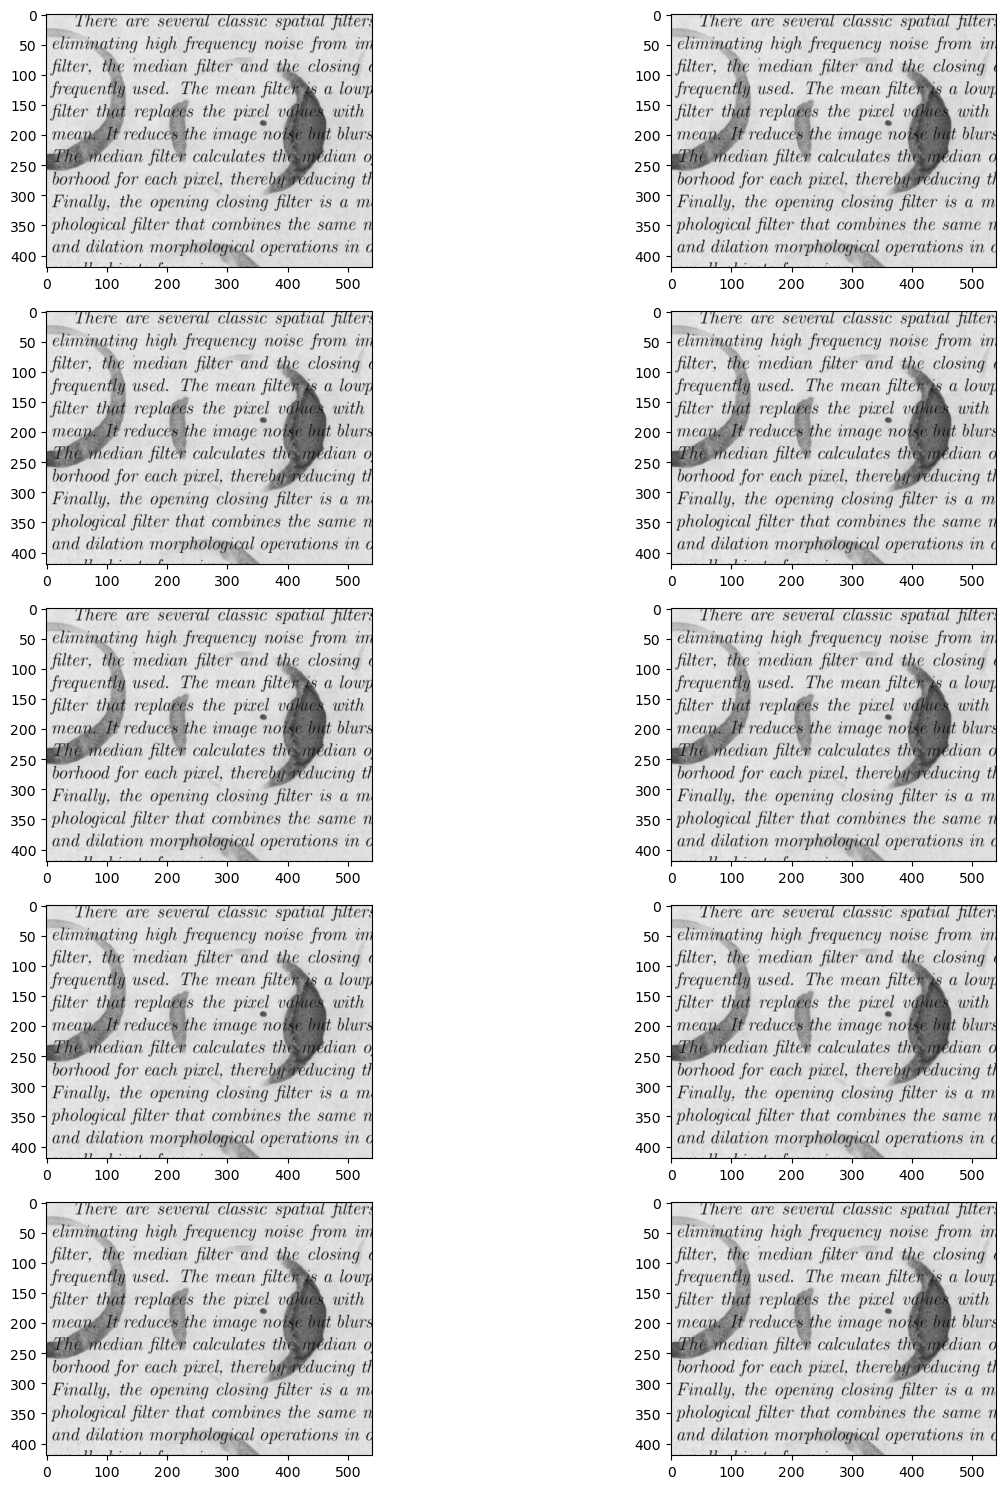

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):

        ax[i,j].imshow(x_test[6])
#         ax[i,j].imshow(X[50])


plt.tight_layout()

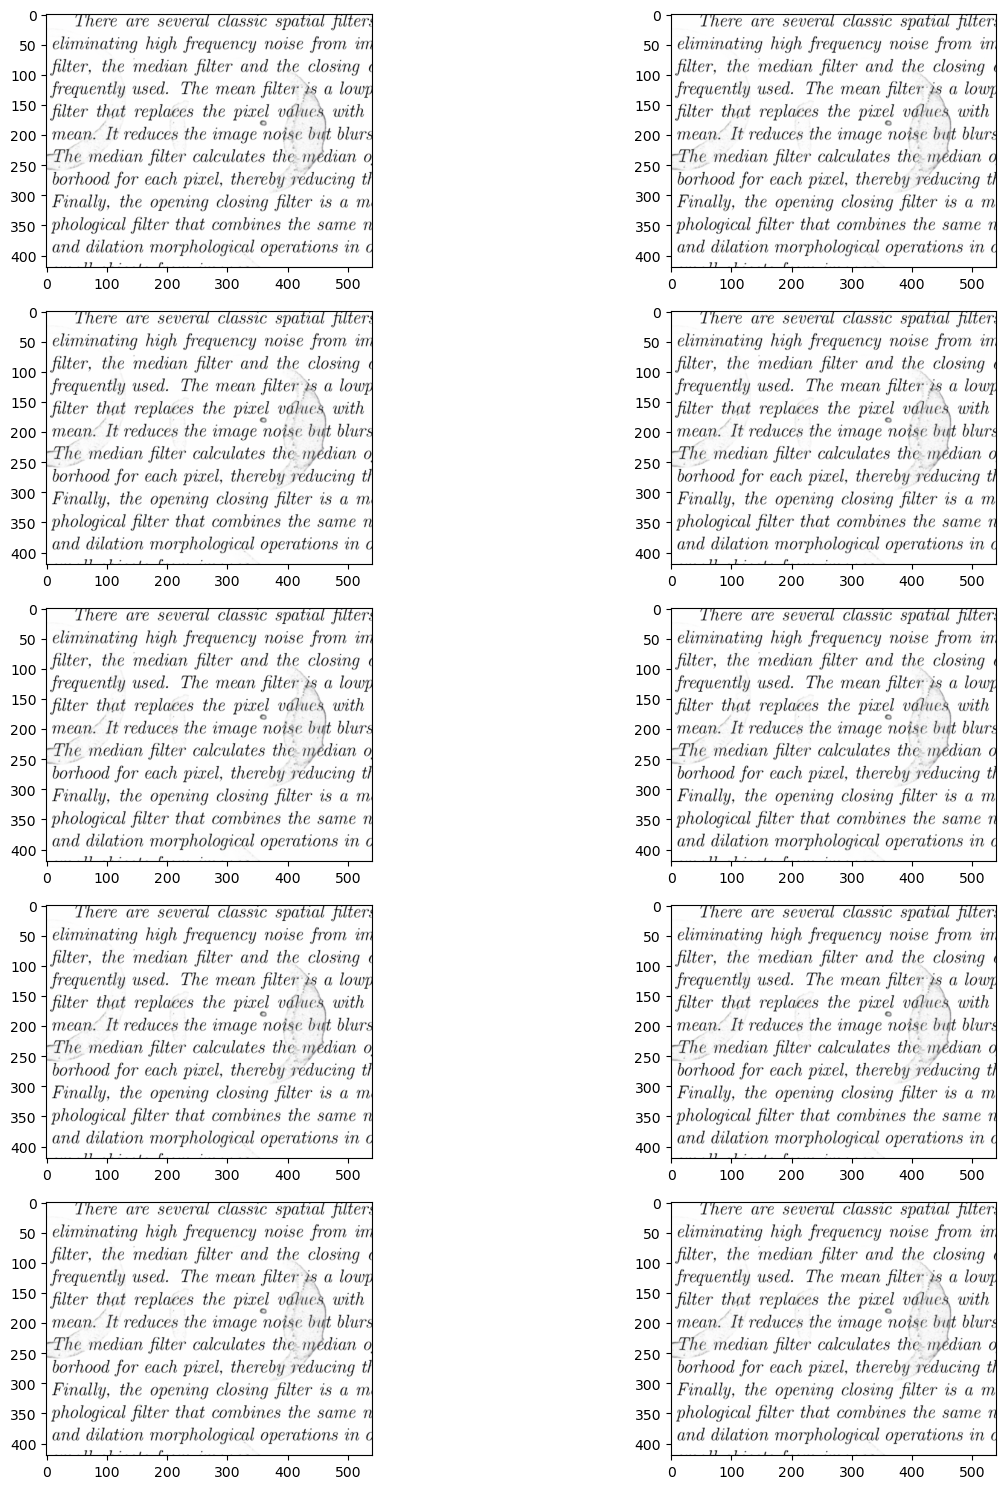

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):

        ax[i,j].imshow(pred[6])
#         ax[i,j].imshow(X[50])


plt.tight_layout()

In [ ]:
test = []
labels = []
make_train_data(test,DIR = '/kaggle/input/aitxdil-project-jupyter/Test_Data/Test_Data')


100%|██████████| 44/44 [00:00<00:00, 67.02it/s]


In [ ]:
test = np.array(test)
test = test/255
test.shape

(44, 420, 540, 3)

In [ ]:
test_data_predicted = model.predict(test)
test_data_predicted.shape

# test_data_predicted = test_data_predicted/255


2/2 [==============================] - 1s 1s/step


(44, 420, 540, 3)

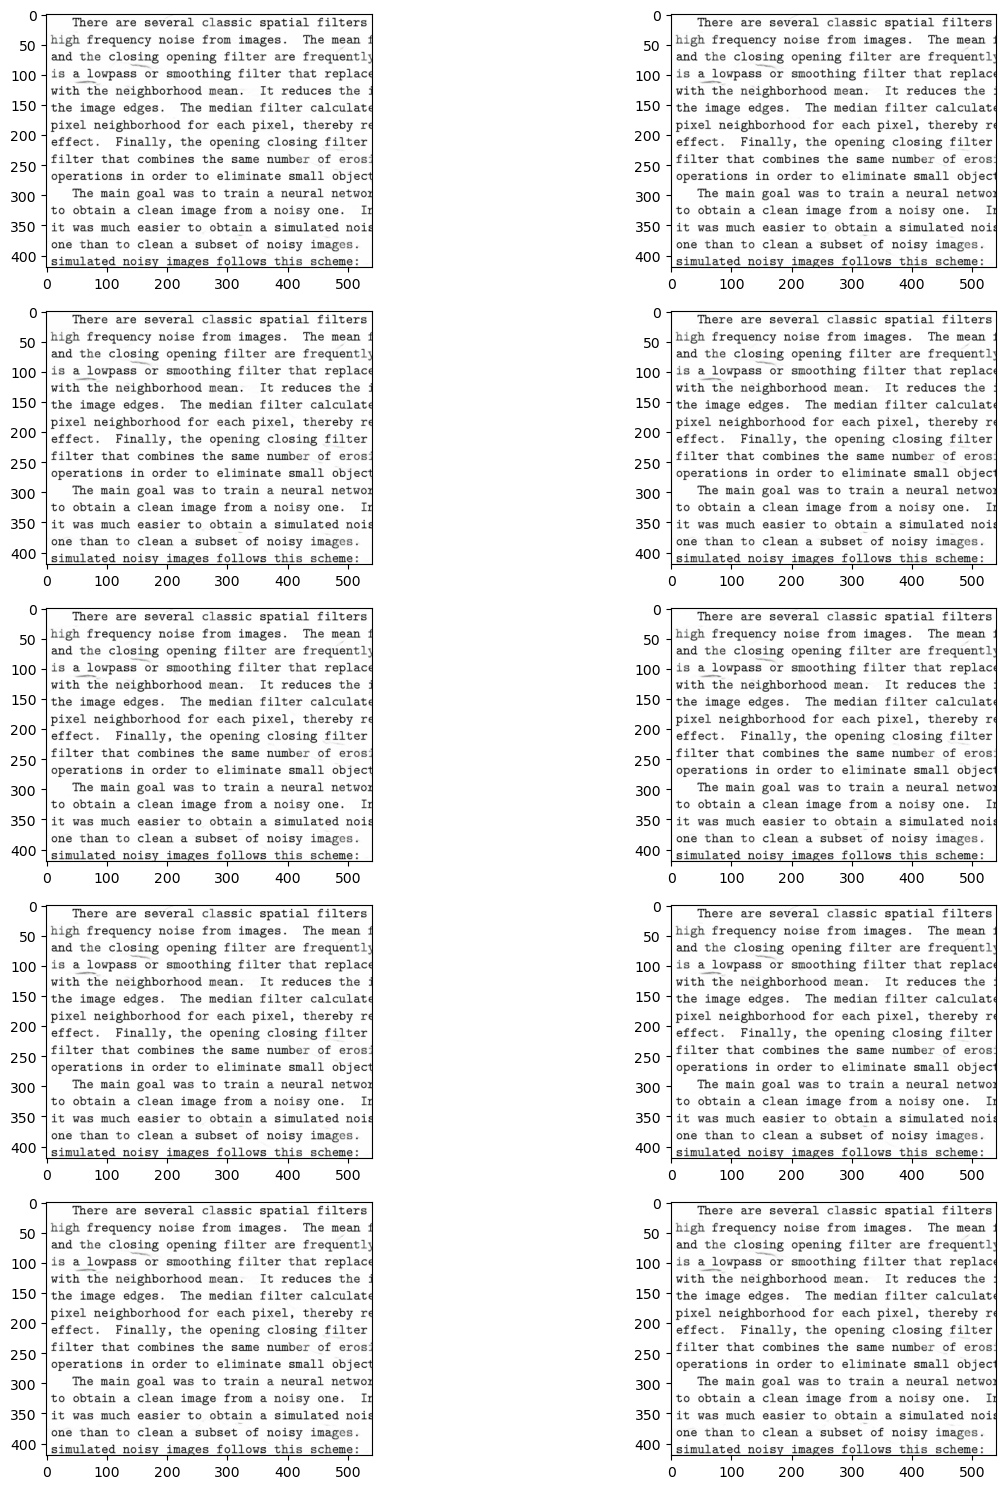

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):

        ax[i,j].imshow(test_data_predicted[5])
#         ax[i,j].imshow(X[50])


plt.tight_layout()


In [ ]:
import glob

image_extensions = ['*.jpg', '*.jpeg', '*.png']  # list of file extensions for image files
image_files = []

# iterate through directories and subdirectories to find image files
for extension in image_extensions:
    image_files.extend(glob.glob(os.path.join('/kaggle/input/aitxdil-project-jupyter/Test_Data/Test_Data', '**', extension), recursive=True))

# extract the filename from the file path for each image file
image_names = [os.path.basename(file) for file in image_files]
name = [int(my_string[:my_string.index('.')]) for my_string in image_names]


# print the list of image names
print(name)


[37, 35, 11, 31, 4, 43, 40, 33, 9, 14, 1, 39, 20, 38, 2, 10, 36, 18, 21, 12, 28, 22, 34, 41, 7, 29, 17, 5, 3, 16, 8, 24, 32, 6, 23, 15, 30, 27, 13, 25, 0, 19, 26, 42]


In [ ]:
# Assuming each image in test has the same number of rows and columns
num_rows, num_cols = 420,540

# Open a file to write the CSV data
with open('test_pixel_values.csv', 'w') as f:
    f.write('id,Value\n')
    for i,image in enumerate(test):
        for j in range(num_rows):
            for k in range(num_cols):
                pixel_id = f'{name[i]+1}_{j+1}_{k+1}'
                pixel_value = (image[j, k][0]*0.21) + (image[j, k][1]*0.72) + (image[j, k][2]*0.07)
                f.write(f'{pixel_id},{pixel_value}\n')

In [ ]:
!pip install tinymlgen

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.4 MB/s eta 0:00:0000:01
  Created wheel for tinymlgen: filename=tinymlgen-0.2-py3-none-any.whl size=2242 sha256=30307fa8e6b986966a3b1769a9687c0a609ea24840508712e6b5fd28813ff6e5
  Stored in directory: /root/.cache/pip/wheels/ef/db/59/d1cac23421c4c083bf422d7775e32f67fdf29a8690d72cb7b6
  Created wheel for hexdump: filename=hexdump-3.3-py3-none-any.whl size=8913 sha256=7c05c20644c3161d7c5de256abcfe55101c5d634e38d7f5ee448069cc9a3f4a4
  Stored in directory: /root/.cache/pip/wheels/81/c1/b5/5ae3b97622e8e8193994f5c83e67da5b997c46e901626d07c3
Successfully built tinymlgen hexdump
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

open("tinyDenoisy.tflite", "wb").write(tflite_model)

!xxd -i tinyDenoisy.tflite > tinyDenoisy.cc

In [ ]:
from tinymlgen import port
c_code = port(model, variable_name='tinyDenoisy', pretty_print=True, optimize=False)

with open('tinyDenoisy.h', 'w') as f:
    print(c_code, file=f)